In [58]:
import pandas as pd
import ast

In [72]:
dataset_df = pd.read_csv('/mnt/c/Users/tobias.lindenbauer/PycharmProjects/vcs-actions-agent/data/scraped_raw_dataset.csv')

We know that we have some duplicates, lets see if there is a pattern, such as errors.

In [73]:
duplicates = dataset_df[dataset_df.duplicated(subset=['id'])]

In [74]:
duplicates.error.isna().value_counts()

error
False    71
Name: count, dtype: int64

All of the duplicates are erroneous samples.

In [75]:
duplicates.error.apply(lambda err: err.split('write error:')[-1])

461      No space left on device\nfatal: fetch-pack: i...
642      No space left on device\nfatal: fetch-pack: i...
677     Traceback (most recent call last):\n  File "/s...
780      No space left on device\nfatal: fetch-pack: i...
790      No space left on device\nfatal: fetch-pack: i...
                              ...                        
7701    Traceback (most recent call last):\n  File "/s...
7856     No space left on device\nfatal: fetch-pack: i...
7909     No space left on device\nfatal: fetch-pack: i...
7926     No space left on device\nfatal: fetch-pack: i...
7933     No space left on device\nfatal: fetch-pack: i...
Name: error, Length: 71, dtype: object

We note that by far the most common issue is that the repository did not fit into the file system. Thus we should increase the file system size if we ever re-compute the dataset. Let's drop the duplicates.

In [76]:
dataset_df = dataset_df.drop_duplicates(subset=['id'])

In [77]:
dataset_df['file_commit_gram_scenarios'] = dataset_df['file_commit_gram_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])
dataset_df['merge_scenarios'] = dataset_df['merge_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])
dataset_df['cherry_pick_scenarios'] = dataset_df['cherry_pick_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])

In [80]:
dataset_df['n_file_commit_gram_scenarios'] = dataset_df['file_commit_gram_scenarios'].apply(lambda row: len(row))
dataset_df['n_merge_scenarios'] = dataset_df['merge_scenarios'].apply(lambda row: len(row))
dataset_df['n_cherry_pick_scenarios'] = dataset_df['cherry_pick_scenarios'].apply(lambda row: len(row))

## Python

In [86]:
python_subset = dataset_df[dataset_df['programming_language'] == 'python']
python_subset['n_file_commit_gram_scenarios'].sum()

196344

In [111]:
python_subset['n_file_commit_gram_scenarios'].median()

15.0

In [90]:
python_subset['n_merge_scenarios'].sum()

353026

In [112]:
python_subset['n_merge_scenarios'].median()

28.0

In [91]:
python_subset['n_cherry_pick_scenarios'].sum()

50133

In [115]:
python_subset['n_cherry_pick_scenarios'].describe()

count    4966.000000
mean       10.095248
std       101.739279
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max      5731.000000
Name: n_cherry_pick_scenarios, dtype: float64

In [116]:
len(python_subset)

4966

In [89]:
# Compute median file-commit gram length
python_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.727272727272727

<Axes: title={'center': 'Cherry-Pick Scenarios Per Repository - Python'}>

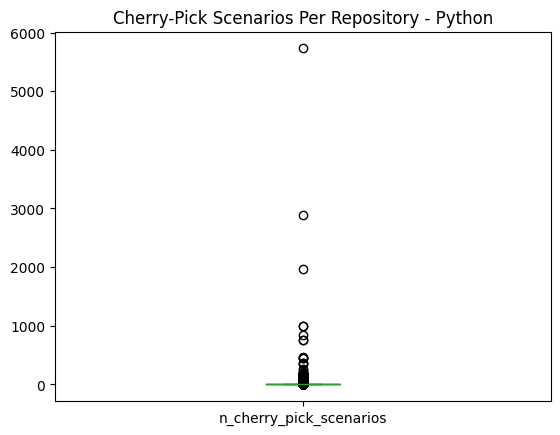

In [95]:
python_subset['n_cherry_pick_scenarios'].plot(kind='box', title='Cherry-Pick Scenarios Per Repository - Python')

## Java

In [96]:
java_subset = dataset_df[dataset_df['programming_language'] == 'java']
java_subset['n_file_commit_gram_scenarios'].sum()

170909

In [97]:
java_subset['n_merge_scenarios'].sum()

183668

In [98]:
java_subset['n_cherry_pick_scenarios'].sum()

99925

In [99]:
# Compute median file-commit gram length
java_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.442233413191219

In [117]:
len(java_subset)

2470

<Axes: title={'center': 'Merge Scenarios Per Repository - Java'}>

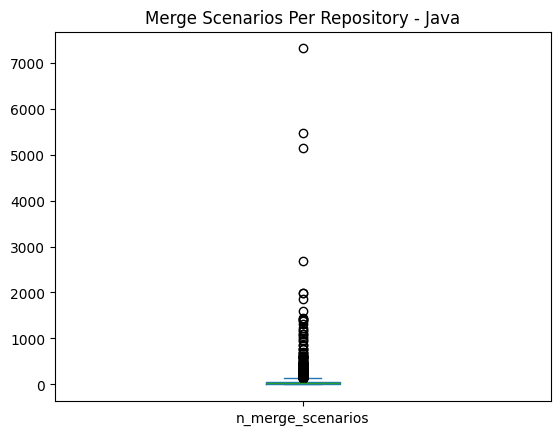

In [102]:
java_subset['n_merge_scenarios'].plot(kind='box', title='Merge Scenarios Per Repository - Java')

## Kotlin

In [103]:
kotlin_subset = dataset_df[dataset_df['programming_language'] == 'kotlin']
kotlin_subset['n_file_commit_gram_scenarios'].sum()

21810

In [104]:
kotlin_subset['n_merge_scenarios'].sum()

33322

In [105]:
kotlin_subset['n_cherry_pick_scenarios'].sum()

7761

In [106]:
# Compute median file-commit gram length
kotlin_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.504545454545455

In [118]:
len(kotlin_subset)

496

<Axes: title={'center': 'Cherry-Pick Scenarios Per Repository - Kotlin'}>

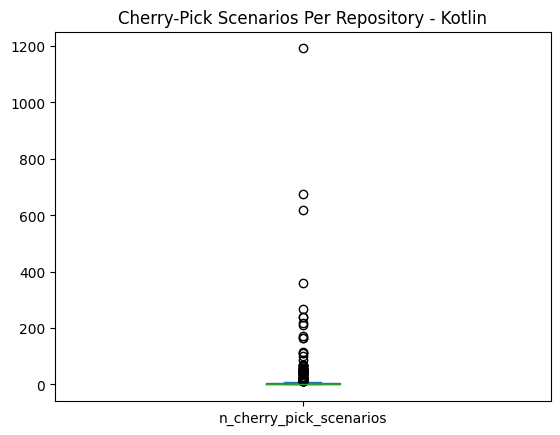

In [109]:
kotlin_subset['n_cherry_pick_scenarios'].plot(kind='box', title='Cherry-Pick Scenarios Per Repository - Kotlin')

## Errors

In [120]:
dataset_df[~dataset_df.error.isna()].programming_language.value_counts()

programming_language
python    44
java      23
kotlin     4
Name: count, dtype: int64